In [52]:
import numpy as np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import pandas_profiling


ModuleNotFoundError: No module named 'pandas_profiling'

In [119]:
df_train = pd.read_csv("big_mart.csv")
df_test = pd.read_csv("big_mart.csv")


In [120]:
print(train.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket 

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            607 non-null    object 
 1   Item_Weight                491 non-null    float64
 2   Item_Fat_Content           607 non-null    object 
 3   Item_Visibility            607 non-null    float64
 4   Item_Type                  607 non-null    object 
 5   Item_MRP                   607 non-null    float64
 6   Outlet_Identifier          607 non-null    object 
 7   Outlet_Establishment_Year  607 non-null    int64  
 8   Outlet_Size                417 non-null    object 
 9   Outlet_Location_Type       607 non-null    object 
 10  Outlet_Type                607 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 52.3+ KB


In [122]:
#Checking the columns in Training dataset......
print("Columns in training dataset based on datatypes {}".format(df_train.columns.to_series().groupby(df_train.dtypes).groups))


Columns in training dataset based on datatypes {int64: ['Outlet_Establishment_Year'], float64: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], object: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']}


In [123]:
#Checking the dimensions
df_train.shape

(723, 12)

In [124]:
#Checking missing values..............
df_train.isnull().sum()

Item_Identifier                0
Item_Weight                  127
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  209
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [125]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

In [126]:
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])

<AxesSubplot:>

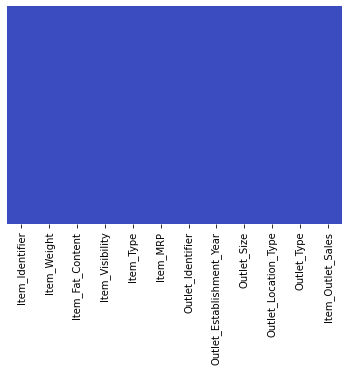

In [127]:
#Lets check whether we still have missing values in our dataset!!
import seaborn as sns
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [128]:
df_train.describe(include = 'all')


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,723,723.000000,723,723.000000,723,723.000000,723,723.000000,723,723,723,723.000000
unique,591,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDL58,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT045,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,3,NaN,449,NaN,114,NaN,93,NaN,436,280,479,NaN
mean,NaN,12.999169,NaN,0.065962,NaN,140.343120,NaN,1997.636238,NaN,NaN,NaN,2227.007070
std,NaN,4.243716,NaN,0.052518,NaN,62.822499,NaN,8.340514,NaN,NaN,NaN,1774.013083
min,NaN,4.785000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,37.950600
25%,NaN,9.240000,NaN,0.026643,NaN,92.627800,NaN,1987.000000,NaN,NaN,NaN,800.291600
50%,NaN,12.999169,NaN,0.052853,NaN,141.515400,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.350000,NaN,0.094007,NaN,187.738500,NaN,2004.000000,NaN,NaN,NaN,3177.197600


In [129]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            723 non-null    object 
 1   Item_Weight                723 non-null    float64
 2   Item_Fat_Content           723 non-null    object 
 3   Item_Visibility            723 non-null    float64
 4   Item_Type                  723 non-null    object 
 5   Item_MRP                   723 non-null    float64
 6   Outlet_Identifier          723 non-null    object 
 7   Outlet_Establishment_Year  723 non-null    int64  
 8   Outlet_Size                723 non-null    object 
 9   Outlet_Location_Type       723 non-null    object 
 10  Outlet_Type                723 non-null    object 
 11  Item_Outlet_Sales          723 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 67.9+ KB


<AxesSubplot:>

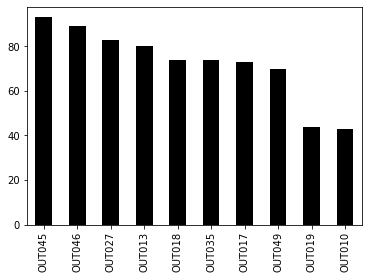

In [130]:
#Visualizing the "Outlet_Identifier"
df_train['Outlet_Identifier'].value_counts().plot(kind='bar',color = 'Black')

In [131]:
df_train = df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:>

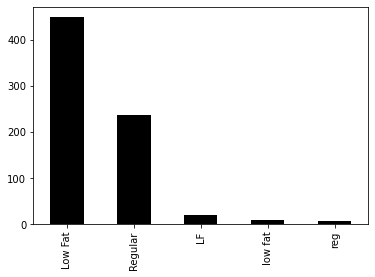

In [132]:
df_train['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'black')

In [133]:
df_train =  df_train.replace(to_replace ="low fat",  value ="Low Fat") 
df_train =  df_train.replace(to_replace ="LF",  value ="Low Fat") 
df_train =  df_train.replace(to_replace ="reg",  value ="Regular")

<AxesSubplot:>

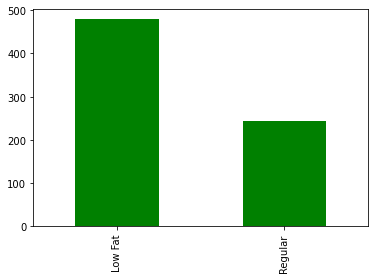

In [134]:
#Visualizing the "Item_Fat_Content"
df_train['Item_Fat_Content'].value_counts().plot(kind='bar',color = 'Green')

<AxesSubplot:>

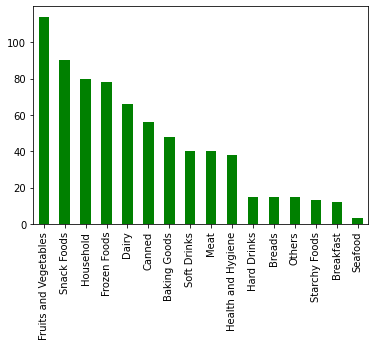

In [135]:
#Visualizing the "Item_Type"
df_train['Item_Type'].value_counts().plot(kind='bar',color = 'Green')

<AxesSubplot:>

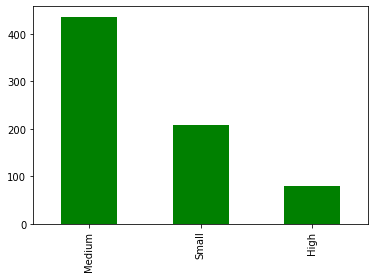

In [136]:
#Visualizing the "Outlet_Size"
df_train['Outlet_Size'].value_counts().plot(kind='bar',color = 'green')

<AxesSubplot:>

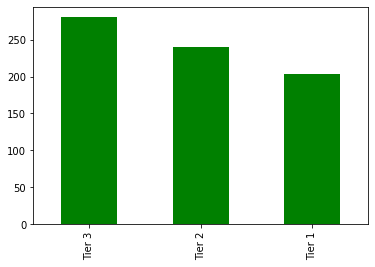

In [137]:
#Visualizing the "Outlet_Location_Type"
df_train['Outlet_Location_Type'].value_counts().plot(kind='bar',color = 'Green')


<AxesSubplot:>

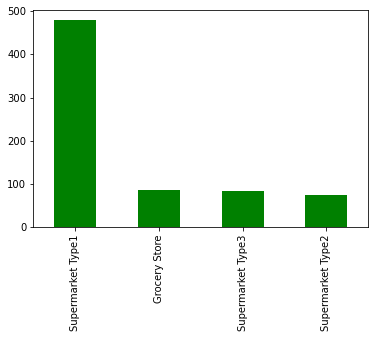

In [138]:
#Visualizing the "Outlet_Type"
df_train['Outlet_Type'].value_counts().plot(kind='bar',color = 'green')

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

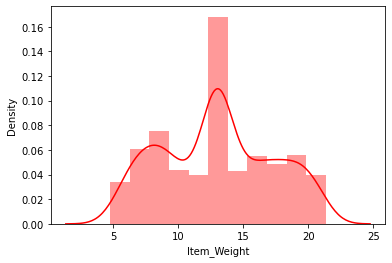

In [139]:
y = df_train['Item_Weight']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'red')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

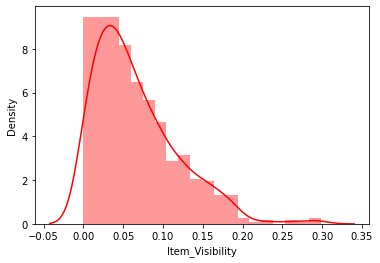

In [140]:
y = df_train['Item_Visibility']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'red')

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

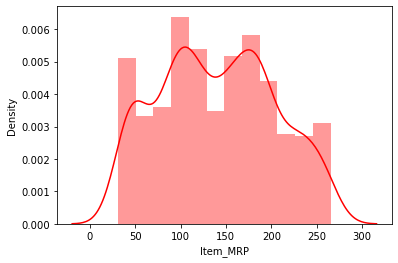

In [141]:
y = df_train['Item_MRP']
plt.figure(1);
sns.distplot(y, kde=True,color = 'red')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

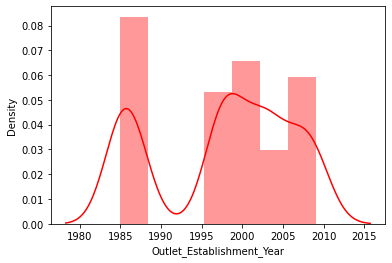

In [142]:
y = df_train['Outlet_Establishment_Year']
plt.figure(1); 
sns.distplot(y, kde=True,color = 'red')


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

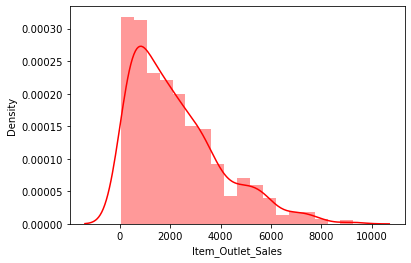

In [143]:
y = df_train['Item_Outlet_Sales']
plt.figure(1);
sns.distplot(y, kde=True,color = 'red')

In [144]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:>

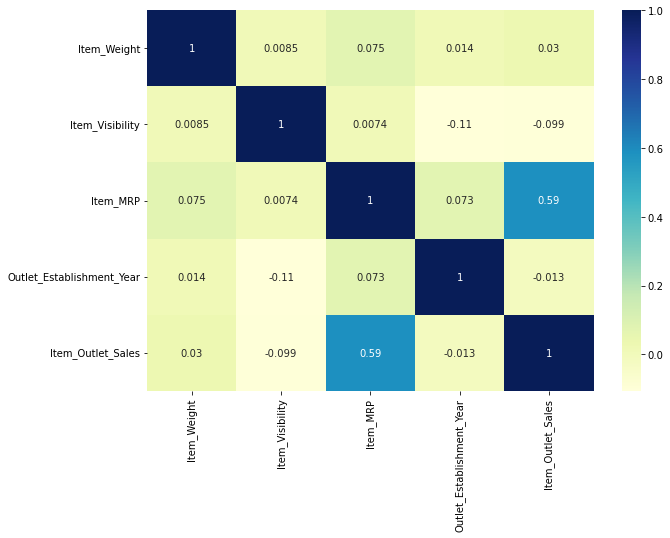

In [145]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")

In [146]:
categorical_columns=[x for x in df_train.dtypes.index if df_train.dtypes[x]=='object']
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [147]:
df_train.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,323.456354
Supermarket Type1,2326.786133
Supermarket Type2,2120.590995
Supermarket Type3,3741.338764


In [148]:
#print frequencies of these categories
for col in categorical_columns:
    print('Frequency of categories for variable')
    print(df_train[col].value_counts())
    print("\n")

Frequency of categories for variable
Low Fat    479
Regular    244
Name: Item_Fat_Content, dtype: int64


Frequency of categories for variable
Fruits and Vegetables    114
Snack Foods               90
Household                 80
Frozen Foods              78
Dairy                     66
Canned                    56
Baking Goods              48
Soft Drinks               40
Meat                      40
Health and Hygiene        38
Hard Drinks               15
Breads                    15
Others                    15
Starchy Foods             13
Breakfast                 12
Seafood                    3
Name: Item_Type, dtype: int64


Frequency of categories for variable
Medium    436
Small     207
High       80
Name: Outlet_Size, dtype: int64


Frequency of categories for variable
Tier 3    280
Tier 2    240
Tier 1    203
Name: Outlet_Location_Type, dtype: int64


Frequency of categories for variable
Supermarket Type1    479
Grocery Store         87
Supermarket Type3     83
Supermarket Ty

In [149]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df_train.columns:
    df_train[col] = labelencoder.fit_transform(df_train[col])


In [150]:
df_train=pd.get_dummies(df_train, columns=['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type'],drop_first=False)

print(df_train.shape)

(723, 33)


In [151]:
df_train.columns


Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6',
       'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10',
       'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14',
       'Item_Type_15', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [152]:
df_train.shape


(723, 33)

In [153]:
for col in df_train.columns: 
    print(col)

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales
Item_Fat_Content_0
Item_Fat_Content_1
Item_Type_0
Item_Type_1
Item_Type_2
Item_Type_3
Item_Type_4
Item_Type_5
Item_Type_6
Item_Type_7
Item_Type_8
Item_Type_9
Item_Type_10
Item_Type_11
Item_Type_12
Item_Type_13
Item_Type_14
Item_Type_15
Outlet_Size_0
Outlet_Size_1
Outlet_Size_2
Outlet_Location_Type_0
Outlet_Location_Type_1
Outlet_Location_Type_2
Outlet_Type_0
Outlet_Type_1
Outlet_Type_2
Outlet_Type_3


In [154]:
#Separating features and label
X = df_train.iloc[:,0:33].values
y = df_train.iloc[:,-1].values

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [156]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[5.02871570e-01 3.47895831e-01 1.22402153e-01 2.67467218e-02
 6.11866291e-05 5.25432132e-06 3.83579350e-06 2.28923178e-06
 1.99010795e-06 1.38414197e-06 1.16381527e-06 9.05514381e-07
 8.21929784e-07 7.78500566e-07 6.96515157e-07 6.01579135e-07
 5.17520065e-07 4.70272890e-07 4.44161367e-07 4.07013090e-07
 2.09633465e-07 1.70249824e-07 1.55415083e-07 1.48262972e-07
 1.16706802e-07 1.02258896e-07 4.49460994e-08 2.94939981e-08
 3.53802467e-33 3.53802467e-33 3.53802467e-33 3.53802467e-33
 3.53802467e-33]


In [157]:
len(explained_variance)


33

In [158]:
print("Sorted List returned :")
print(sorted(explained_variance,reverse = True))

Sorted List returned :
[0.5028715703162578, 0.3478958313414954, 0.12240215253299319, 0.02674672179482981, 6.118662905538887e-05, 5.254321322112753e-06, 3.835793496179198e-06, 2.289231780793437e-06, 1.9901079507574436e-06, 1.3841419725775323e-06, 1.1638152709423967e-06, 9.055143811281495e-07, 8.219297838161661e-07, 7.785005661756947e-07, 6.965151572340561e-07, 6.015791351921982e-07, 5.17520064770942e-07, 4.7027288988423086e-07, 4.441613666842681e-07, 4.070130902328871e-07, 2.0963346494400437e-07, 1.702498242062526e-07, 1.5541508290793215e-07, 1.482629719508698e-07, 1.1670680234307457e-07, 1.0225889609438786e-07, 4.4946099420675266e-08, 2.9493998085474222e-08, 3.538024665587239e-33, 3.538024665587239e-33, 3.538024665587239e-33, 3.538024665587239e-33, 3.538024665587239e-33]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

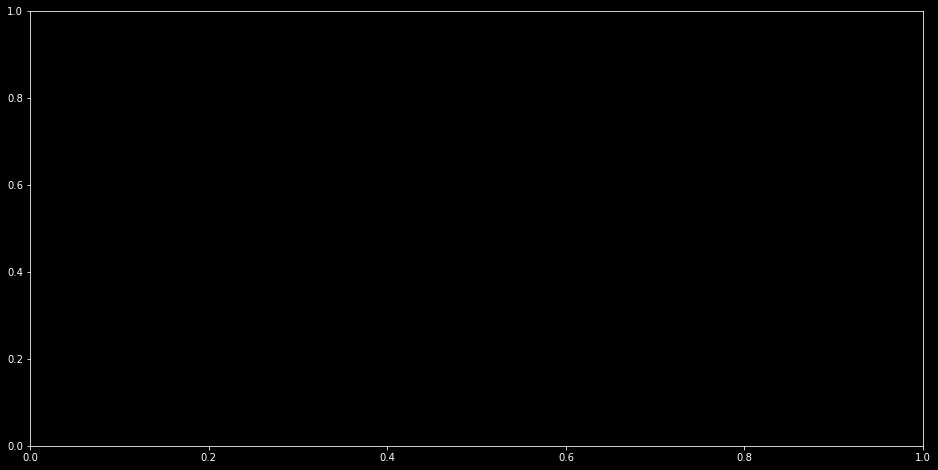

In [165]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(16, 8))
    
    plt.bar(range(33), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [166]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.51673582 0.35748738 0.1257768 ]


In [160]:
#Model comparison
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [161]:
##Fit Decision_tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)


DecisionTreeRegressor()

In [162]:
#Fit Random_forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [107]:
#Fit Ada_Boost_Regressor..........
Ada_boost = AdaBoostRegressor()
Ada_boost.fit(X_train, y_train)

AdaBoostRegressor()

In [109]:
#Fit Gradient_Boosting_Regressor........
Gradient_boosting = GradientBoostingRegressor()
Gradient_boosting.fit(X_train, y_train)

GradientBoostingRegressor()

In [108]:
#Fit Extra_tree_regressor........
Extra_trees = ExtraTreesRegressor()
Extra_trees.fit(X_train, y_train)

ExtraTreesRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

ETC = ExtraTreesRegressor()
gb_param_grid = {'n_estimators' : [100,200,300,400,500],
              'max_depth': [4, 8,12,16],
              'min_samples_leaf' : [100,150,200,250],
              'max_features' : [0.3, 0.1] 
              }

gsETC = GridSearchCV(ETC,param_grid = gb_param_grid, cv=10, n_jobs= -1, verbose = 0)

gsETC.fit(X_train,y_train)

In [ ]:
ETC_best = gsETC.best_estimator_


In [ ]:
# Best score
gsETC.best_score_,gsETC.best_params_